In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing, feature_selection
%matplotlib inline
from IPython.display import Markdown, display

In [2]:
# Changing options to display full result
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.max_colwidth', None)

# Print np arrays without truncation
np.set_printoptions(threshold=np.inf)

# 2 decimals for operations in pandas
pd.set_option('precision', 2)

# More information on Pandas Styling here: https://pandas.pydata.org/pandas-docs/stable/style.html
# Matplotlib color maps: https://matplotlib.org/users/colormaps.html

def highlight_max(s):
    '''
    highlight the maximum in a Series green.
    '''
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def highlight_min(s):
    '''
    highlight the minimum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

# Data Understanding and Visualization

## Levels.fyi data

In [12]:
# Reading datasets

levels_df = pd.read_csv('./data/levels_fyi_salary_data.csv')

In [4]:
# Features
levels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [21]:
# Top 3 highest base salary companies by title
# Top 3 highest base salary location by title
# Mean base salary by title, by gender and difference
# Mean base salary by title, by race
# Mean Base Salary by Location (bar plot)
# Mean Stock Grant by Location (bar plot)
# Mean Total Compensation by Location (bar plot)
# Base Salary distribution (histogram)
# Total Compensation distribution (histogram)
# Stock Grant distribution (histogram)
# Number of Workers by Location by title (stacked bar plot)
# Experience vs Base Salary (regression plot)
# Experience vs Total Compensation (regression plot)
# Base Salary By Education Level (boxplot)
# Total Compensation By Education Level (boxplot)
# Stock Grant Value by Title (boxplot)
# Base Salary by Title (boxplot)
# Total Compensation by Title (boxplot)
# Years of experience by Title (boxplot)

In [5]:
# sde = levels_df[levels_df['title'] == 'Software Engineer']
# gp = sde.groupby('company').agg({'basesalary':'median'})
# gp.sort_values(by='basesalary', ascending=False).head(5)

titles = levels_df['title'].unique().tolist()
locations = levels_df['location'].unique().tolist()
companies = levels_df['company'].unique().tolist()
stem_titles = ['Product Manager','Software Engineer',
'Software Engineering Manager',
 'Data Scientist',
 'Solution Architect',
 'Technical Program Manager',
 'Hardware Engineer',
 'Mechanical Engineer']

# df considering only stem_titles
stem_df = levels_df[levels_df.title.isin(stem_titles)]

In [6]:
# Top 3 highest base salary companies by title

# basesalary_company_title = levels_df.groupby(['title','company']).agg({'basesalary':'median'})['basesalary'].groupby(level=0, group_keys=False)
# basesalary_company_title.nlargest(3)

basesalary_company_title = stem_df.groupby(['title','company']).agg({'basesalary':'median'})['basesalary'].groupby(level=0, group_keys=False)
basesalary_company_title.nlargest(3)


title                         company                      
Data Scientist                Netflix                          435000.0
                              Roblox                           277500.0
                              Brex                             275000.0
Hardware Engineer             startup                          252000.0
                              Snap                             240000.0
                              Palo Alto Networks               230000.0
Mechanical Engineer           IBM                              258000.0
                              Johnson                          200000.0
                              Waymo                            190000.0
Product Manager               Ford                             450000.0
                              HERE Technologies                429500.0
                              Netflix                          350000.0
Software Engineer             Netflix                          450000.0
    

In [7]:
# Top 3 highest base salary location by title

# basesalary_location_title = levels_df.groupby(['title','location']).agg({'basesalary':'median'})['basesalary'].groupby(level=0, group_keys=False)
# basesalary_location_title.nlargest(3)

basesalary_location_title = stem_df.groupby(['title','location']).agg({'basesalary':'median'})['basesalary'].groupby(level=0, group_keys=False)
basesalary_location_title.nlargest(3)


title                         location               
Data Scientist                Illinois City, IL          450000.0
                              Los Gatos, CA              400000.0
                              Kirkland, WA               213000.0
Hardware Engineer             Venice, CA                 240000.0
                              Foster City, CA            220000.0
                              Beaverton, OR              207500.0
Mechanical Engineer           Menlo Park, CA             181500.0
                              Reston, VA                 180000.0
                              Mountain View, CA          163000.0
Product Manager               Los Altos, CA              800000.0
                              Los Gatos, CA              325000.0
                              Paterson, NJ               240000.0
Software Engineer             Los Gatos, CA              450000.0
                              San Mateo, FL              323000.0
                      

In [8]:
# Median base salary by title, difference by gender (Male, Female)

# median_salaries = levels_df.pivot_table('basesalary', index='title', columns='gender', aggfunc='median')
median_salaries = stem_df.pivot_table('basesalary', index='title', columns='gender', aggfunc='median')
median_salaries.drop(['Other', 'Title: Senior Software Engineer'], axis=1, inplace=True)
median_salaries['diff'] = median_salaries['Male'] - median_salaries['Female']
median_salaries['PctFemaleToMaleSalary'] = median_salaries['Female'] / median_salaries['Male']
median_salaries.sort_values(by='diff', ascending=False)


gender                          Female      Male     diff  \
title                                                       
Solution Architect            136500.0  150000.0  13500.0   
Product Manager               145000.0  155000.0  10000.0   
Technical Program Manager     150000.0  158000.0   8000.0   
Software Engineer             131000.0  135000.0   4000.0   
Hardware Engineer             139000.0  140000.0   1000.0   
Data Scientist                140000.0  140000.0      0.0   
Software Engineering Manager  178000.0  175000.0  -3000.0   
Mechanical Engineer           119000.0  110000.0  -9000.0   

gender                        PctFemaleToMaleSalary  
title                                                
Solution Architect                             0.91  
Product Manager                                0.94  
Technical Program Manager                      0.95  
Software Engineer                              0.97  
Hardware Engineer                              0.99  
Data Scientist                                 1.00  
Software Engineering Manager                   1.02  
Mechanical Engineer                            1.08

In [9]:
# Median base salary by title and Race

# median_salaries_race = levels_df.pivot_table('basesalary', index='title', columns='Race', aggfunc='median')
median_salaries_race = stem_df.pivot_table('basesalary', index='title', columns='Race', aggfunc='median')
median_salaries_race.style.apply(highlight_max, axis=1)

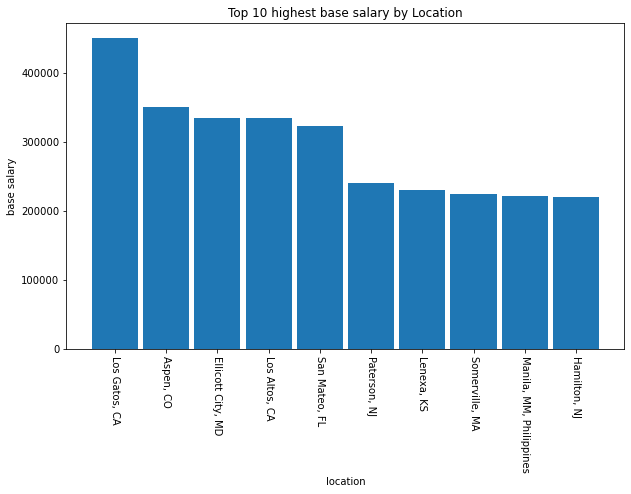

In [18]:
# Median Base Salary by Location (bar plot)

# salary_location = levels_df.groupby('location').agg({'basesalary':'median'}).sort_values(by='basesalary', ascending=False)
salary_location = stem_df.groupby('location').agg({'basesalary':'median'}).sort_values(by='basesalary', ascending=False)
salary_location = salary_location.iloc[:10]

# fig = px.bar(salary_location, x=salary_location.index, y='basesalary', title="Top 10 highest base salary by Location")
# fig.show("notebook")

plt.figure(figsize = (10,6))
plt.bar(salary_location.index, salary_location['basesalary'], width = 0.9)
plt.xlabel("location")
plt.ylabel("base salary")
plt.title("Top 10 highest base salary by Location")
plt.xticks(rotation = -90)
plt.show()


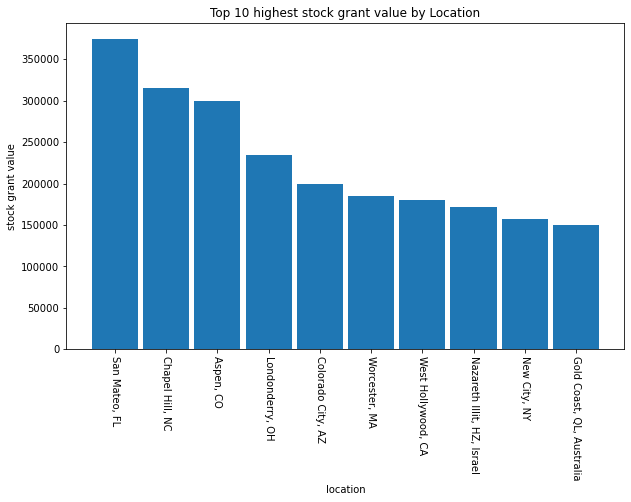

In [197]:
# Mean Stock Grant by Location (bar plot)

# stock_location = levels_df.groupby('location').agg({'stockgrantvalue':'mean'}).sort_values(by='stockgrantvalue', ascending=False)
stock_location = stem_df.groupby('location').agg({'stockgrantvalue':'mean'}).sort_values(by='stockgrantvalue', ascending=False)
stock_location = stock_location.iloc[:10]

# fig = px.bar(stock_location, x=stock_location.index, y='stockgrantvalue', title="Top 10 highest stock grant value by Location")
# fig.show("notebook")

plt.figure(figsize = (10,6))
plt.bar(stock_location.index, stock_location['stockgrantvalue'], width = 0.9)
plt.xlabel("location")
plt.ylabel("stock grant value")
plt.title("Top 10 highest stock grant value by Location")
plt.xticks(rotation = -90)
plt.show()


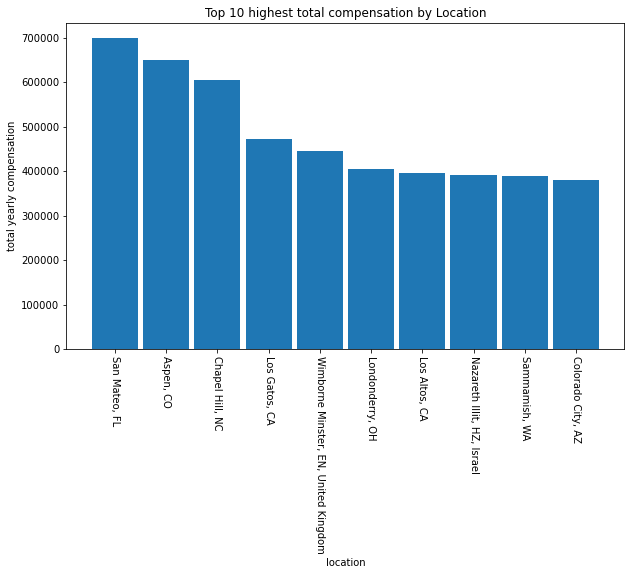

In [19]:
# Median Total Compensation by Location (bar plot)

# total_comp_location = levels_df.groupby('location').agg({'totalyearlycompensation':'median'}).sort_values(by='totalyearlycompensation', ascending=False)
total_comp_location = stem_df.groupby('location').agg({'totalyearlycompensation':'median'}).sort_values(by='totalyearlycompensation', ascending=False)
total_comp_location = total_comp_location.iloc[:10]

# fig = px.bar(total_comp_location, x=total_comp_location.index, y='totalyearlycompensation', title="Top 10 highest total compensation by Location")
# fig.show("notebook")

plt.figure(figsize = (10,6))
plt.bar(total_comp_location.index, total_comp_location['totalyearlycompensation'], width = 0.9)
plt.xlabel("location")
plt.ylabel("total yearly compensation")
plt.title("Top 10 highest total compensation by Location")
plt.xticks(rotation = -90)
plt.show()


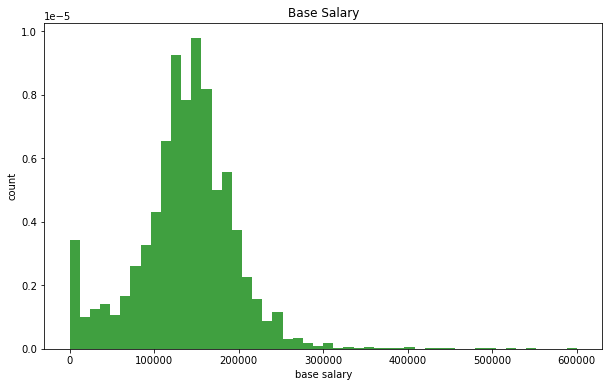

In [226]:
# Base Salary distribution (histogram)

# fig = px.histogram(levels_df, x="basesalary", nbins=50, title='Histogram of base salary')
# fig = px.histogram(stem_df, x="basesalary", nbins=50, title='Histogram of base salary')
# fig.show("notebook")

plt.figure(figsize = (10,6))
# plt.hist(levels_df['basesalary'], 50, density=True, facecolor='g', alpha=0.75, range=[0, 600000])
plt.hist(stem_df['basesalary'], 50, density=True, facecolor='g', alpha=0.75, range=[0, 600000])
plt.title('Base Salary')
plt.xlabel('base salary')
plt.ylabel('count')
plt.show()


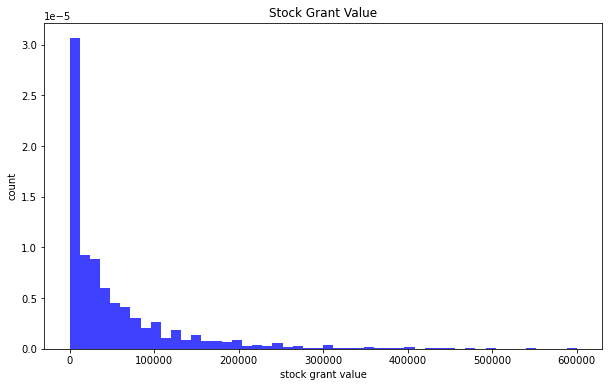

In [221]:
# Stock Grant distribution (histogram)

# fig = px.histogram(levels_df, x="stockgrantvalue", nbins=50, title='Histogram of stock grant value')
# fig = px.histogram(stem_df, x="stockgrantvalue", nbins=50, title='Histogram of stock grant value')
# fig.show("notebook")

plt.figure(figsize = (10,6))
# plt.hist(levels_df['stockgrantvalue'], 50, facecolor='b', density=True, alpha=0.75, range=[0, 600000])
plt.hist(stem_df['stockgrantvalue'], 50, facecolor='b', density=True, alpha=0.75, range=[0, 600000])
plt.title('Stock Grant Value')
plt.xlabel('stock grant value')
plt.ylabel('count')
plt.show()


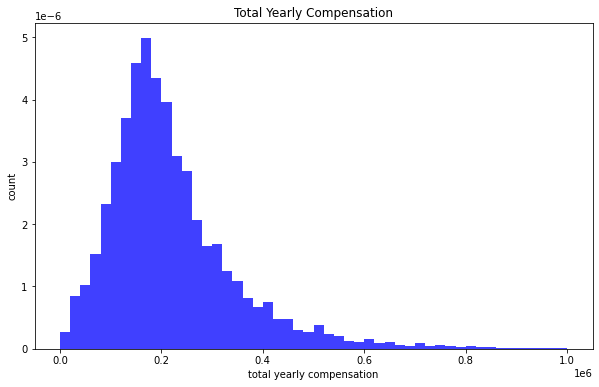

In [222]:
# Total Compensation distribution (histogram)

# fig = px.histogram(levels_df, x="totalyearlycompensation", nbins=50, title='Histogram of total yearly compensation')
# fig = px.histogram(stem_df, x="totalyearlycompensation", nbins=50, title='Histogram of total yearly compensation')
# fig.show("notebook")

plt.figure(figsize = (10,6))
# plt.hist(levels_df['totalyearlycompensation'], 50, facecolor='b', density=True, alpha=0.75, range=[0, 1000000])
plt.hist(stem_df['totalyearlycompensation'], 50, facecolor='b', density=True, alpha=0.75, range=[0, 1000000])
plt.title('Total Yearly Compensation')
plt.xlabel('total yearly compensation')
plt.ylabel('count')
plt.show()


In [124]:
# Top 10 Number of Workers by Location by title (stacked bar plot)

# top_locations = levels_df["location"].value_counts().iloc[:10].index.to_list()
# workers = levels_df[levels_df.location.isin(top_locations)].groupby(['location','title']).size().reset_index(name='count')

top_locations = stem_df["location"].value_counts().iloc[:10].index.to_list()
workers = stem_df[stem_df.location.isin(top_locations)].groupby(['location','title']).size().reset_index(name='count')


fig = px.bar(workers, x="location", y="count", color="title",barmode="stack", title='Top 10 Workers Location')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show("notebook")


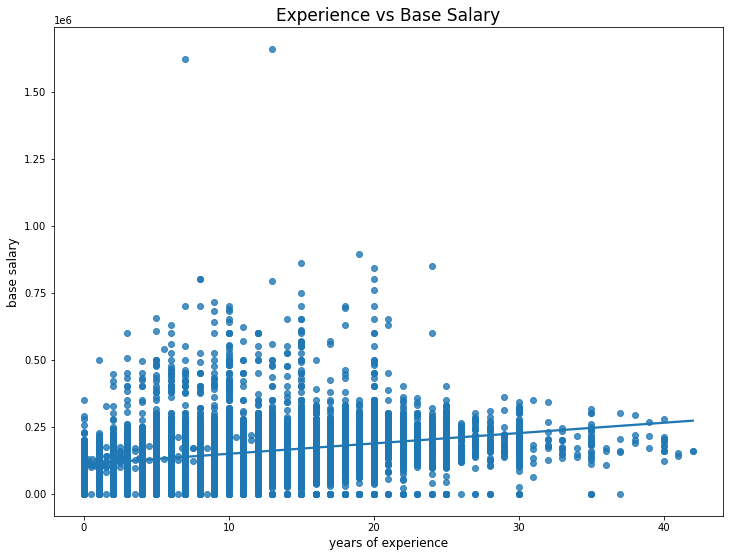

In [18]:
# Experience vs Base Salary (regression plot)

# data = levels_df
data = stem_df

# Using plotly
# fig = px.scatter(data, x="yearsofexperience", y="basesalary", title="Experience vs Base Salary", trendline="ols")
# fig.show("notebook")

# using matplotlib
# x = data['yearsofexperience']
# y = data['basesalary']

# fig, ax = plt.subplots(figsize = (12, 9))
# ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
# plt.title("Experience vs Base Salary")
# plt.xlabel("experience")
# plt.ylabel("base salary")
# # Fit linear regression via least squares with numpy.polyfit
# # It returns an slope (b) and intercept (a)
# # deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)
# # Create sequence of 100 numbers from 0 to 40
# xseq = np.linspace(0, 50, num=100)
# # Plot regression line
# ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

# Using sns
plt.figure(figsize=(12,9))
sns.regplot(x=data["yearsofexperience"], y=data["basesalary"])
plt.title("Experience vs Base Salary", size=17)
plt.xlabel("years of experience", size=12)
plt.ylabel("base salary", size=12)
plt.show()


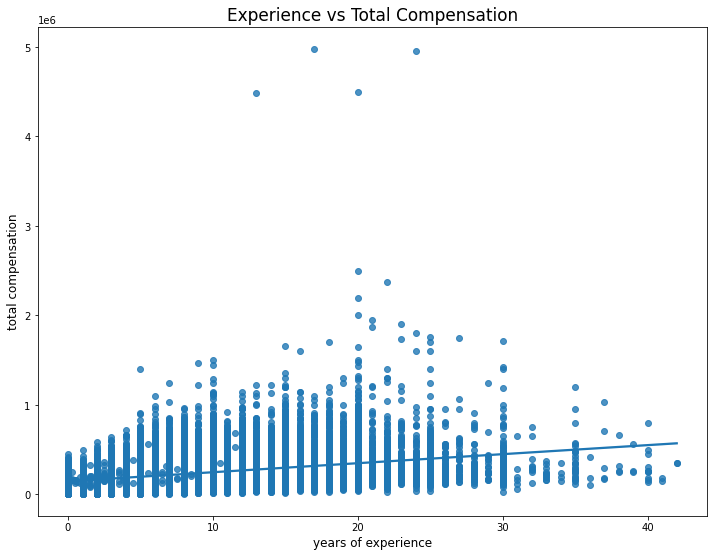

In [19]:
# Experience vs Total Compensation (regression plot)

# data = levels_df
data = stem_df

# Using plotly
# fig = px.scatter(data, x="yearsofexperience", y="totalyearlycompensation", title="Experience vs Total Compensation", trendline="ols")
# fig.show("notebook")

# Using matplotlib
# x = data['yearsofexperience']
# y = data['totalyearlycompensation']

# fig, ax = plt.subplots(figsize = (12, 9))
# ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
# plt.title("Experience vs Total Compensation")
# plt.xlabel("experience")
# plt.ylabel("total compensation")
# # Fit linear regression via least squares with numpy.polyfit
# # It returns an slope (b) and intercept (a)
# # deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)
# # Create sequence of 100 numbers from 0 to 50
# xseq = np.linspace(0, 50, num=100)
# # Plot regression line
# ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

# Using sns
plt.figure(figsize=(12,9))
sns.regplot(x=data["yearsofexperience"], y=data["totalyearlycompensation"])
plt.title("Experience vs Total Compensation", size=17)
plt.xlabel("years of experience", size=12)
plt.ylabel("total compensation", size=12)
plt.show()


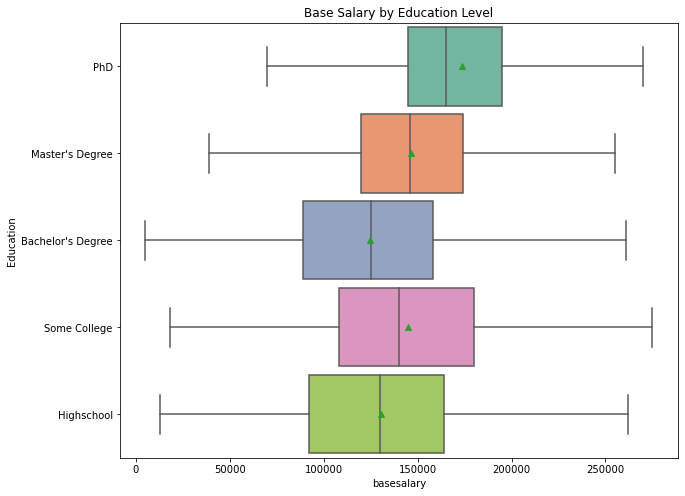

In [5]:
# Base Salary By Education Level (boxplot)

# data = levels_df
data = stem_df

# fig = px.box(levels_df, y="Education", x="basesalary", range_x=[0,1000000], title="Base Salary by Education Level")
# fig = px.box(stem_df, y="Education", x="basesalary", range_x=[0,1000000], title="Base Salary by Education Level")
# fig.show("notebook")

plt.figure(figsize = (10,8))
plt.title('Base Salary by Education Level')
ax = sns.boxplot(data=data, x='basesalary', y='Education', palette="Set2", fliersize=5, width=0.9, showmeans=True, showfliers = False)


In [6]:
data.groupby('Education')['basesalary'].describe()

count       mean       std      min       25%       50%  \
Education                                                                      
Bachelor's Degree  11032.0  124534.08  58979.33   5000.0   89000.0  125000.0   
Highschool           282.0  130400.71  68469.95  13000.0   92250.0  130000.0   
Master's Degree    14059.0  146490.79  52785.22      0.0  120000.0  146000.0   
PhD                 1652.0  173645.88  57270.14  14000.0  145000.0  165000.0   
Some College         314.0  144866.24  59736.97  18000.0  108000.0  140000.0   

                        75%       max  
Education                              
Bachelor's Degree  158000.0  893000.0  
Highschool         164000.0  600000.0  
Master's Degree    174000.0  800000.0  
PhD                195000.0  700000.0  
Some College       180000.0  650000.0

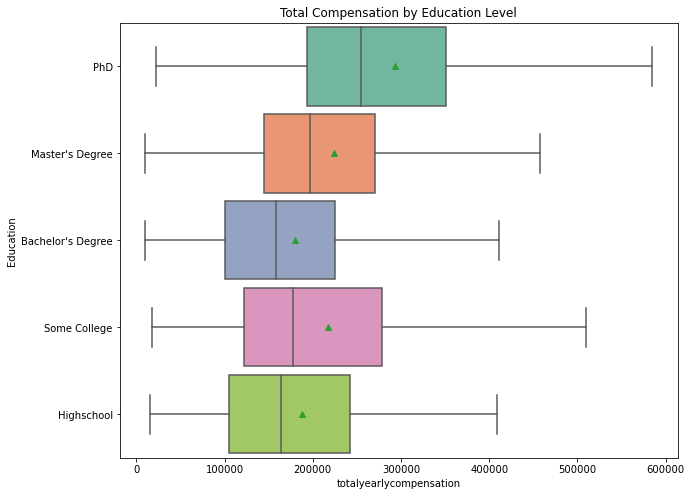

In [272]:
# Total Compensation By Education Level (boxplot)

# data = levels_df
data = stem_df

# fig = px.box(data, y="Education", x="totalyearlycompensation", range_x=[0,1000000], title="Total Compensation by Education Level")
# fig.show("notebook")

plt.figure(figsize = (10,8))
plt.title('Total Compensation by Education Level')
ax = sns.boxplot(data=data, x='totalyearlycompensation', y='Education', palette="Set2", fliersize=5, width=0.9, showmeans=True, showfliers = False)
# ax.set(xlim=(0, 1000000))


In [7]:
data.groupby('Education')['totalyearlycompensation'].describe()

count       mean        std      min       25%       50%  \
Education                                                                       
Bachelor's Degree  11032.0  179671.14  120664.57  10000.0  101000.0  158000.0   
Highschool           282.0  187900.71  122120.93  15000.0  105250.0  164000.0   
Master's Degree    14059.0  223559.00  140026.33  10000.0  145000.0  197000.0   
PhD                 1652.0  292904.36  149653.32  22000.0  193750.0  255000.0   
Some College         314.0  216748.41  133137.91  18000.0  122000.0  177000.0   

                        75%       max  
Education                              
Bachelor's Degree  225000.0  1.73e+06  
Highschool         242250.0  8.75e+05  
Master's Degree    270000.0  4.98e+06  
PhD                350500.0  1.22e+06  
Some College       278000.0  6.80e+05

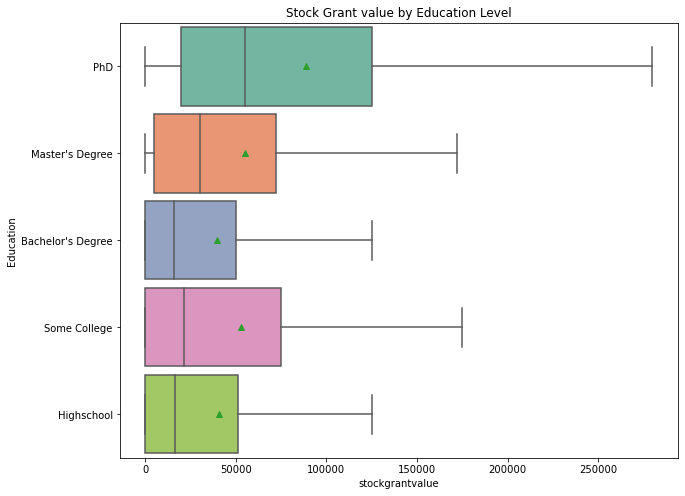

In [271]:
# Stock Grant Value by Education Level (boxplot)


# data = levels_df
data = stem_df

# fig = px.box(data, y="Education", x="stockgrantvalue", range_x=[0,1000000], title="Stock Grant value by Education Level")
# fig.show("notebook")

plt.figure(figsize = (10,8))
plt.title('Stock Grant value by Education Level')
ax = sns.boxplot(data=data, x='stockgrantvalue', y='Education', palette="Set2", fliersize=5, width=0.9, showmeans=True, showfliers = False)


In [8]:
data.groupby('Education')['stockgrantvalue'].describe()

count      mean        std  min      25%      50%  \
Education                                                                
Bachelor's Degree  11032.0  39376.60   67213.62  0.0      0.0  16000.0   
Highschool           282.0  40719.86   64328.64  0.0      0.0  16500.0   
Master's Degree    14059.0  55340.22   79469.67  0.0   5000.0  30000.0   
PhD                 1652.0  88946.13  103857.19  0.0  20000.0  55000.0   
Some College         314.0  53133.76   77558.73  0.0      0.0  21500.0   

                        75%        max  
Education                               
Bachelor's Degree   50000.0   954000.0  
Highschool          51000.0   500000.0  
Master's Degree     72000.0  1000000.0  
PhD                125000.0   800000.0  
Some College        75000.0   400000.0

[(0.0, 400000.0)]

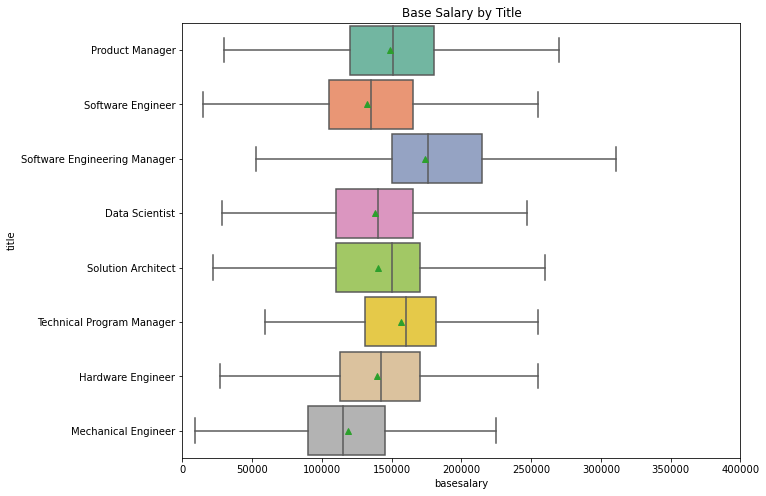

In [270]:
# Base Salary by Title (boxplot)

# data = levels_df
data = stem_df

# fig = px.box(data, y="title", x="basesalary", range_x=[0,1000000], title="Base Salary by Title")
# fig.show("notebook")

plt.figure(figsize = (10,8))
plt.title('Base Salary by Title')
ax = sns.boxplot(data=data, x='basesalary', y='title', palette="Set2", fliersize=5, width=0.9, showmeans=True, showfliers = False)
ax.set(xlim=(0, 400000))

In [9]:
data.groupby('title')['basesalary'].describe()

count       mean       std  min       25%  \
title                                                                       
Data Scientist                 2578.0  138054.69  64405.54  0.0  110000.0   
Hardware Engineer              2200.0  139628.18  49327.80  0.0  112750.0   
Mechanical Engineer             490.0  118455.10  41107.36  0.0   90000.0   
Product Manager                4673.0  148663.56  67337.64  0.0  120000.0   
Software Engineer             41231.0  132414.62  59552.62  0.0  105000.0   
Software Engineering Manager   3569.0  174204.47  78586.06  0.0  150000.0   
Solution Architect             1157.0  140173.51  54823.50  0.0  110000.0   
Technical Program Manager      1381.0  156454.74  43422.28  0.0  131000.0   

                                   50%       75%       max  
title                                                       
Data Scientist                140000.0  165000.0  7.00e+05  
Hardware Engineer             142000.0  170000.0  3.41e+05  
Mechanical Engineer           115000.0  145000.0  2.60e+05  
Product Manager               151000.0  180000.0  1.66e+06  
Software Engineer             135000.0  165000.0  1.62e+06  
Software Engineering Manager  176000.0  215000.0  8.50e+05  
Solution Architect            150000.0  170000.0  4.00e+05  
Technical Program Manager     160000.0  182000.0  4.30e+05

[(0.0, 1000000.0)]

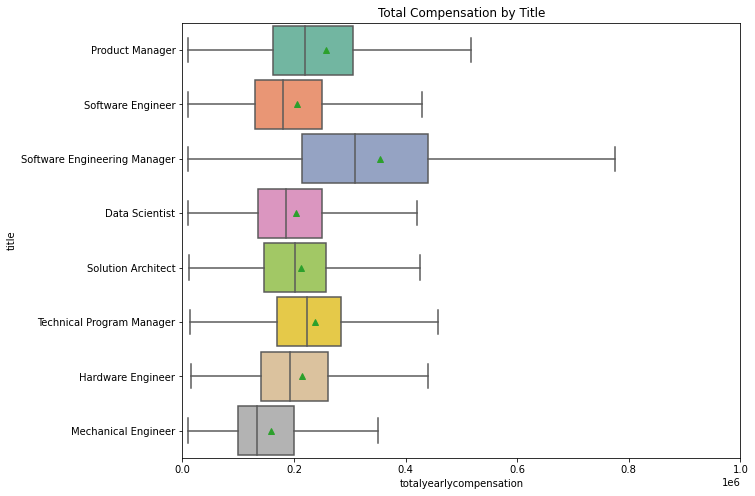

In [267]:
# Total Compensation by Title (boxplot)

# data = levels_df
data = stem_df

# fig = px.box(data, y="title", x="totalyearlycompensation", range_x=[0,1000000], title="Total Compensation by Title")
# fig.show("notebook")

plt.figure(figsize = (10,8))
plt.title('Total Compensation by Title')
ax = sns.boxplot(data=data, x='totalyearlycompensation', y='title', palette="Set2", fliersize=5, width=0.9, showmeans=True, showfliers = False)
ax.set(xlim=(0, 1000000))


In [10]:
data.groupby('title')['totalyearlycompensation'].describe()

count       mean        std      min  \
title                                                                  
Data Scientist                 2578.0  203656.71  109504.64  10000.0   
Hardware Engineer              2200.0  213655.00  108318.82  15000.0   
Mechanical Engineer             490.0  158442.86   87963.61  10000.0   
Product Manager                4673.0  257813.40  182258.21  10000.0   
Software Engineer             41231.0  205403.99  122044.29  10000.0   
Software Engineering Manager   3569.0  354635.75  228501.76  10000.0   
Solution Architect             1157.0  212736.39   96308.74  12000.0   
Technical Program Manager      1381.0  237099.93  108235.25  14000.0   

                                   25%       50%       75%       max  
title                                                                 
Data Scientist                135000.0  185000.0  250000.0  1.00e+06  
Hardware Engineer             140000.0  193500.0  260000.0  1.15e+06  
Mechanical Engineer           100000.0  133000.0  200000.0  6.15e+05  
Product Manager               163000.0  220000.0  305000.0  4.98e+06  
Software Engineer             130000.0  180000.0  250000.0  4.49e+06  
Software Engineering Manager  215000.0  310000.0  440000.0  4.95e+06  
Solution Architect            146000.0  201000.0  258000.0  9.90e+05  
Technical Program Manager     169000.0  224000.0  285000.0  1.50e+06

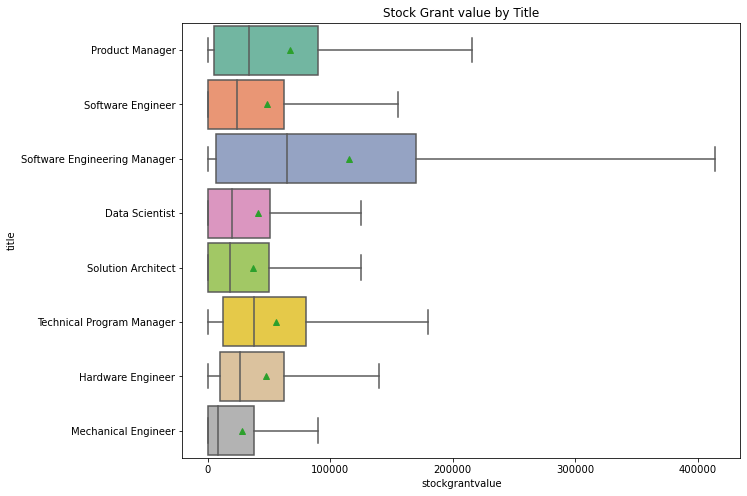

In [265]:
# Stock Grant Value by Title (boxplot)

# data = levels_df
data = stem_df

# fig = px.box(data, y="title", x="stockgrantvalue", range_x=[0,1000000], title="Stock Grant value by Title")
# fig.show("notebook")

plt.figure(figsize = (10,8))
plt.title('Stock Grant value by Title')
ax = sns.boxplot(data=data, x='stockgrantvalue', y='title', palette="Set2", fliersize=5, width=0.9, showmeans=True, showfliers = False)


In [11]:
data.groupby('title')['stockgrantvalue'].describe()

count       mean        std  min      25%  \
title                                                                       
Data Scientist                 2578.0   40867.34   62490.55  0.0      0.0   
Hardware Engineer              2200.0   47796.59   61713.30  0.0  10000.0   
Mechanical Engineer             490.0   28228.57   47972.14  0.0      0.0   
Product Manager                4673.0   67342.65  101372.34  0.0   5000.0   
Software Engineer             41231.0   48635.56   76190.84  0.0      0.0   
Software Engineering Manager   3569.0  115383.17  140813.00  0.0   7000.0   
Solution Architect             1157.0   36808.12   53853.62  0.0      0.0   
Technical Program Manager      1381.0   55970.51   64717.24  0.0  12000.0   

                                  50%       75%       max  
title                                                      
Data Scientist                20000.0   51000.0  7.00e+05  
Hardware Engineer             26000.0   62250.0  8.00e+05  
Mechanical Engineer            8000.0   38000.0  3.66e+05  
Product Manager               34000.0   90000.0  1.66e+06  
Software Engineer             24000.0   62000.0  2.80e+06  
Software Engineering Manager  65000.0  170000.0  1.00e+06  
Solution Architect            18000.0   50000.0  4.00e+05  
Technical Program Manager     38000.0   80000.0  6.00e+05

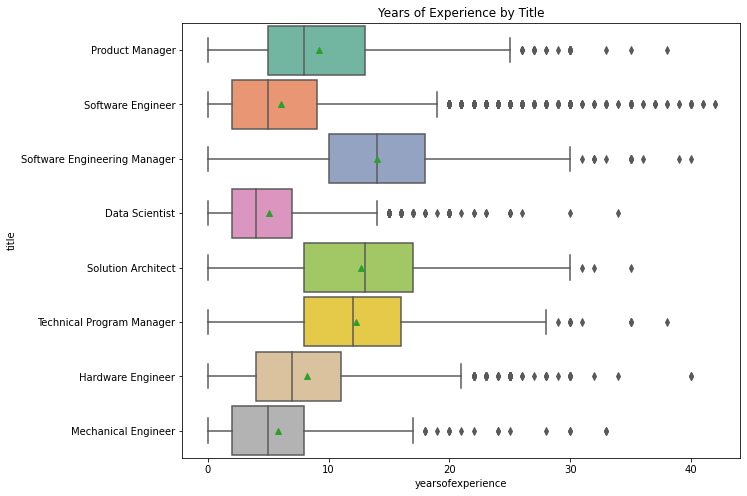

In [274]:
# Years of experience by Title (boxplot)

# data = levels_df
data = stem_df

# fig = px.box(data, y="title", x="yearsofexperience", title="Years of Experience by Title")
# fig.show("notebook")

plt.figure(figsize = (10,8))
plt.title('Years of Experience by Title')
ax = sns.boxplot(data=data, x='yearsofexperience', y='title', palette="Set2", fliersize=5, width=0.9, showmeans=True)


In [12]:
data.groupby('title')['yearsofexperience'].describe()

count   mean   std  min   25%   50%   75%  \
title                                                                       
Data Scientist                 2578.0   5.06  4.10  0.0   2.0   4.0   7.0   
Hardware Engineer              2200.0   8.18  6.17  0.0   4.0   7.0  11.0   
Mechanical Engineer             490.0   5.80  5.13  0.0   2.0   5.0   8.0   
Product Manager                4673.0   9.21  5.72  0.0   5.0   8.0  13.0   
Software Engineer             41231.0   6.09  5.26  0.0   2.0   5.0   9.0   
Software Engineering Manager   3569.0  14.04  5.51  0.0  10.0  14.0  18.0   
Solution Architect             1157.0  12.65  6.73  0.0   8.0  13.0  17.0   
Technical Program Manager      1381.0  12.28  6.14  0.0   8.0  12.0  16.0   

                               max  
title                               
Data Scientist                34.0  
Hardware Engineer             40.0  
Mechanical Engineer           33.0  
Product Manager               38.0  
Software Engineer             42.0  
Software Engineering Manager  40.0  
Solution Architect            35.0  
Technical Program Manager     38.0

## Stackoverflow data

In [ ]:
# Median Yearly compensation by Country (Top 10)
# Median Yearly compensation by Country (Bottom 10)
# Years code pro and yearly compensation (scatter plot)
# Median Compensation by state in the US


In [34]:
# Reading datasets

stack_df = pd.read_csv('./data/survey_results_public.csv', index_col='ResponseId')

In [35]:
stack_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83439 entries, 1 to 83439
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MainBranch                    83439 non-null  object 
 1   Employment                    83323 non-null  object 
 2   Country                       83439 non-null  object 
 3   US_State                      14920 non-null  object 
 4   UK_Country                    4418 non-null   object 
 5   EdLevel                       83126 non-null  object 
 6   Age1stCode                    83243 non-null  object 
 7   LearnCode                     82963 non-null  object 
 8   YearsCode                     81641 non-null  object 
 9   YearsCodePro                  61216 non-null  object 
 10  DevType                       66484 non-null  object 
 11  OrgSize                       60726 non-null  object 
 12  Currency                      61080 non-null  object 
 13  C

In [36]:
# Median Yearly compensation by Country (Top 10)
comp_country = stack_df.groupby(['Country']).agg({'ConvertedCompYearly':'median'}).sort_values(by='ConvertedCompYearly', ascending=False)
comp_country.dropna(inplace=True)
country_median = comp_country['ConvertedCompYearly'].median()
comp_country.head(10)


ConvertedCompYearly
Country                                      
San Marino                           596700.0
North Korea                          240000.0
United States of America             125000.0
Israel                               108564.0
Switzerland                          101649.0
Andorra                               94045.5
Isle of Man                           90482.0
Ireland                               86478.0
Denmark                               85536.0
Qatar                                 84048.0

In [37]:
# Median Yearly compensation by Country (Bottom 10)
comp_country.tail(10)

ConvertedCompYearly
Country                        
Botswana                 5460.0
Madagascar               5160.0
Togo                     5100.0
Guinea                   5064.0
Lesotho                  4812.0
Benin                    4800.0
Cameroon                 4548.0
Yemen                    3954.0
Burundi                  1584.0
Liberia                    12.0

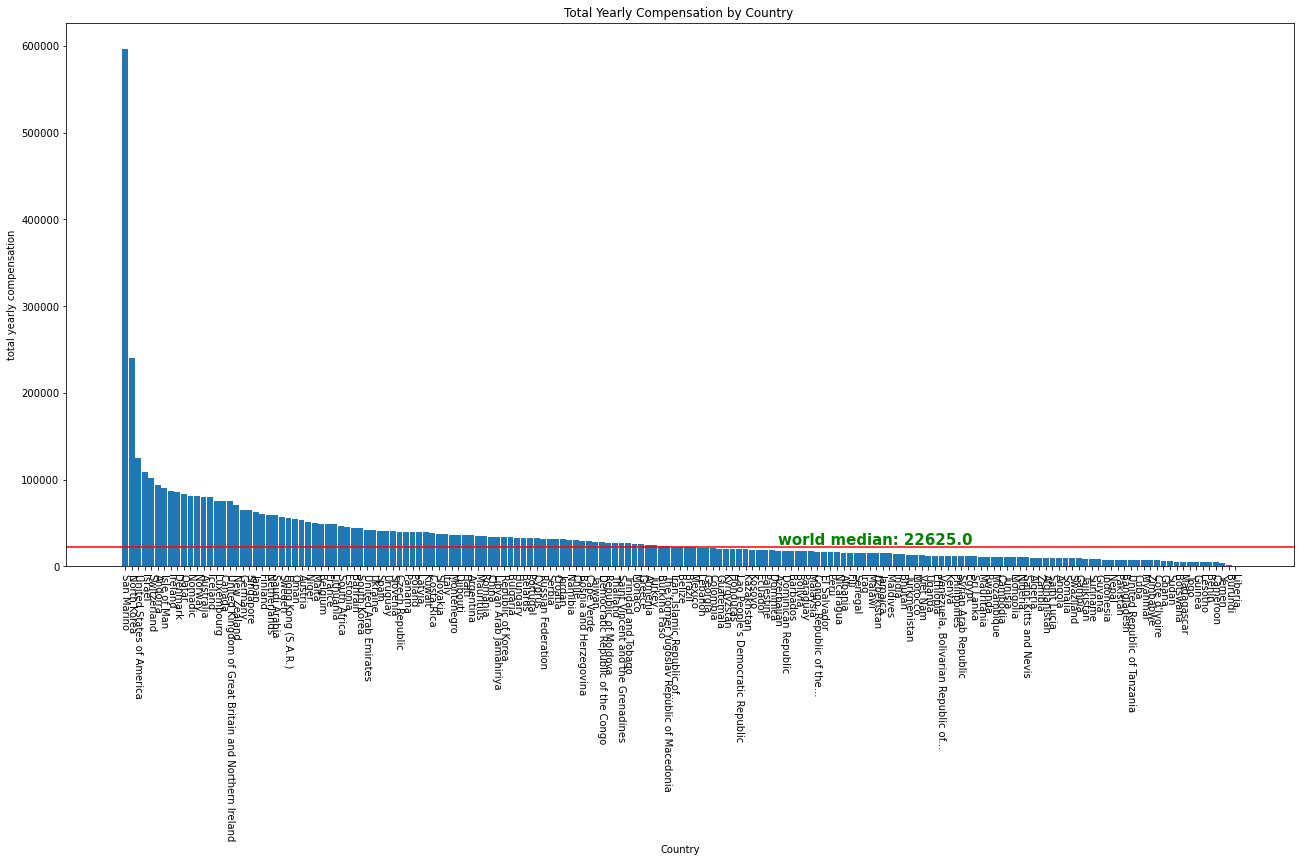

In [45]:
# Bar plot

plt.figure(figsize = (22,10))
plt.bar(comp_country.index, comp_country['ConvertedCompYearly'], width = 0.9)
plt.axhline(country_median, color='r')
plt.annotate('world median: '+str(country_median),xy=(100, country_median+2000), color='g',fontweight='bold', fontsize = 15)
plt.xlabel("Country")
plt.ylabel("total yearly compensation")
plt.title("Total Yearly Compensation by Country ")
plt.xticks(rotation = -90)
plt.show()


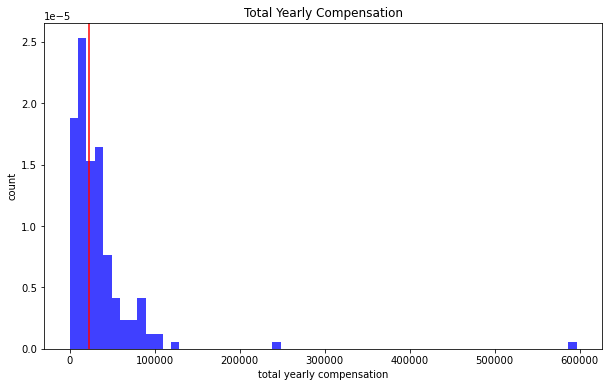

In [52]:
# Histogram

plt.figure(figsize = (10,6))
plt.hist(comp_country['ConvertedCompYearly'], 60, facecolor='b', density=True, alpha=0.75)
plt.title('Total Yearly Compensation')
plt.xlabel('total yearly compensation')
plt.ylabel('count')
plt.axvline(country_median, color='r')
plt.show()


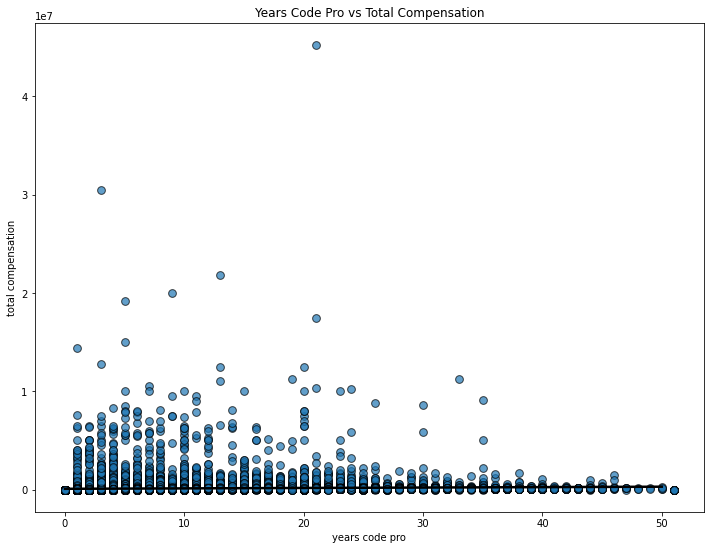

In [7]:
# Years code pro and yearly compensation (scatter plot)

stack_df.dropna(subset=['YearsCodePro', 'ConvertedCompYearly'], inplace=True)

stack_df[stack_df['YearsCodePro'] == 'Less than 1 year'] = 0.0
stack_df[stack_df['YearsCodePro'] == 'More than 50 years'] = 51.0
stack_df['YearsCodePro'] = stack_df['YearsCodePro'].astype(float)

# Using plotly
# fig = px.scatter(stack_df, x="YearsCodePro", y="ConvertedCompYearly", title="Years Code Pro vs Yearly Comp", trendline="ols")
# fig.show("notebook")

# Using matplotlib
x = stack_df['YearsCodePro']
y = stack_df['ConvertedCompYearly']

fig, ax = plt.subplots(figsize = (12, 9))
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
plt.title("Years Code Pro vs Total Compensation")
plt.xlabel("years code pro")
plt.ylabel("total compensation")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 50
xseq = np.linspace(0, 50, num=100)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);


In [16]:
# Median Compensation by state in the US

us_data = stack_df[stack_df['Country'] == 'United States of America']
us_comp_state = us_data.groupby(['US_State']).agg({'ConvertedCompYearly':'median'}).sort_values(by='ConvertedCompYearly', ascending=False)
state_mean = us_comp_state['ConvertedCompYearly'].mean()
state_median = us_comp_state['ConvertedCompYearly'].median()
us_comp_state


ConvertedCompYearly
US_State                                 
Washington                       170000.0
California                       160000.0
New Jersey                       147500.0
Hawaii                           145000.0
New Hampshire                    143500.0
New York                         143000.0
Massachusetts                    142750.0
Delaware                         135000.0
Colorado                         130000.0
Nevada                           130000.0
Texas                            129000.0
Georgia                          129000.0
Virginia                         128000.0
Rhode Island                     127500.0
Maryland                         125500.0
Illinois                         125000.0
District of Columbia             122500.0
Maine                            121000.0
Oregon                           120000.0
Florida                          120000.0
Utah                             120000.0
Connecticut                      120000.0
Arizona                          120000.0
Minnesota                        120000.0
Vermont                          119500.0
North Carolina                   116000.0
Idaho                            113500.0
South Carolina                   113500.0
Missouri                         113000.0
Pennsylvania                     111300.0
Nebraska                         110000.0
Wisconsin                        110000.0
Indiana                          110000.0
Michigan                         108000.0
Kentucky                         106500.0
South Dakota                     106000.0
Kansas                           105750.0
Arkansas                         105282.0
Tennessee                        105000.0
Iowa                             105000.0
Ohio                             104916.0
Alabama                          104500.0
West Virginia                    100500.0
Montana                          100000.0
New Mexico                       100000.0
Oklahoma                          99678.5
Wyoming                           95000.0
Alaska                            92500.0
Louisiana                         92500.0
Mississippi                       90000.0
North Dakota                      71000.0
Puerto Rico                       64000.0

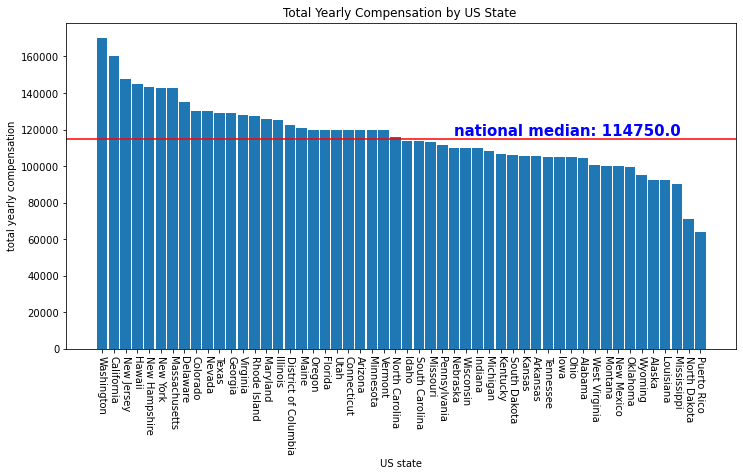

In [27]:
# Bar plot

plt.figure(figsize = (12,6))
plt.bar(us_comp_state.index, us_comp_state['ConvertedCompYearly'], width = 0.9)
plt.axhline(state_median, color='r')
plt.annotate('national median: '+str(state_median),xy=(30, state_median+2000), color='b',fontweight='bold', fontsize = 15,)
plt.xlabel("US state")
plt.ylabel("total yearly compensation")
plt.title("Total Yearly Compensation by US State ")
plt.xticks(rotation = -90)
plt.show()

## US Department of Labor Data

In [9]:
# Reading datasets

dol_df = pd.read_excel('./data/dol_2019_data.xlsx', engine='openpyxl')

In [10]:
dol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Occupation                                        706 non-null    object 
 1   Number full-time workers                          706 non-null    int64  
 2   Number of men                                     706 non-null    int64  
 3   Number of women                                   706 non-null    int64  
 4   Percentage of women in occupational group         706 non-null    float64
 5   Median earnings                                   706 non-null    int64  
 6   Median earnings men                               706 non-null    int64  
 7   Median earnings women                             706 non-null    int64  
 8   Women's earnings as percentage of men's earnings  706 non-null    float64
dtypes: float64(2), int64(6

In [11]:
# Remove duplicate rows
dol_df.drop_duplicates(inplace=True)
dol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 704
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Occupation                                        353 non-null    object 
 1   Number full-time workers                          353 non-null    int64  
 2   Number of men                                     353 non-null    int64  
 3   Number of women                                   353 non-null    int64  
 4   Percentage of women in occupational group         353 non-null    float64
 5   Median earnings                                   353 non-null    int64  
 6   Median earnings men                               353 non-null    int64  
 7   Median earnings women                             353 non-null    int64  
 8   Women's earnings as percentage of men's earnings  353 non-null    float64
dtypes: float64(2), int64(6

In [48]:
# STEM occupations
occs = ['Actuaries',
 'Aerospace engineers',
 'Agricultural and food scientists',
 'Architectural and engineering managers',
 'Biological scientists',
 'Chemical engineers',
 'Civil engineers',
 'Computer and information research scientists',
 'Computer and information systems managers',
 'Computer network architects',
 'Computer programmers',
 'Conservation scientists and foresters',
 'Database administrators and architects',
 'Dentists',
 'Electrical and electronics engineers',
 'Engineers, all other',
 'Environmental engineers',
 'Industrial engineers, including health and safety',
 'Materials engineers',
 'Mechanical engineers',
 'Medical scientists',
 'Other engineering technologists and technicians',
 'Other mathematical science occupations',
 'Physical scientists, all other',
 'Software developers',
 'Software quality assurance analysts and testers',
 'Statisticians',
 'Web developers']

stem_dol_df = dol_df[dol_df['Occupation'].isin(occs)]
non_stem_dol_df = dol_df[np.logical_not(dol_df['Occupation'].isin(occs))]

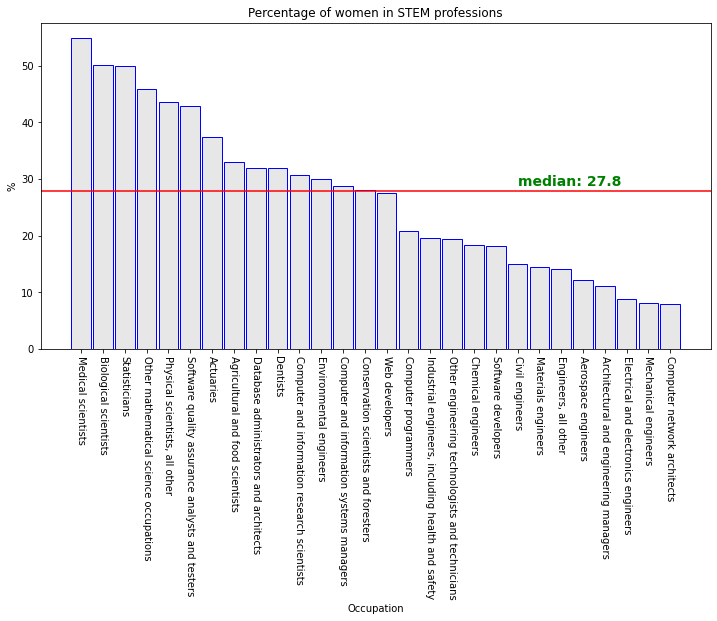

In [57]:
# Bar plot for % of women in occupation

# Bar plot
all_median = stem_dol_df['Percentage of women in occupational group'].median()
pct_sorted = stem_dol_df.sort_values(by='Percentage of women in occupational group', ascending=False)
plt.figure(figsize = (12,6))
plt.bar('Occupation', 'Percentage of women in occupational group', data=pct_sorted,width = 0.9, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.axhline(all_median, color='r')
plt.annotate('median: '+str(all_median), xy=(20, all_median+1), color='g',fontweight='bold', fontsize = 14)
plt.xlabel("Occupation")
plt.ylabel("%")
plt.title("Percentage of women in STEM professions")
plt.xticks(rotation = -90)
plt.show()


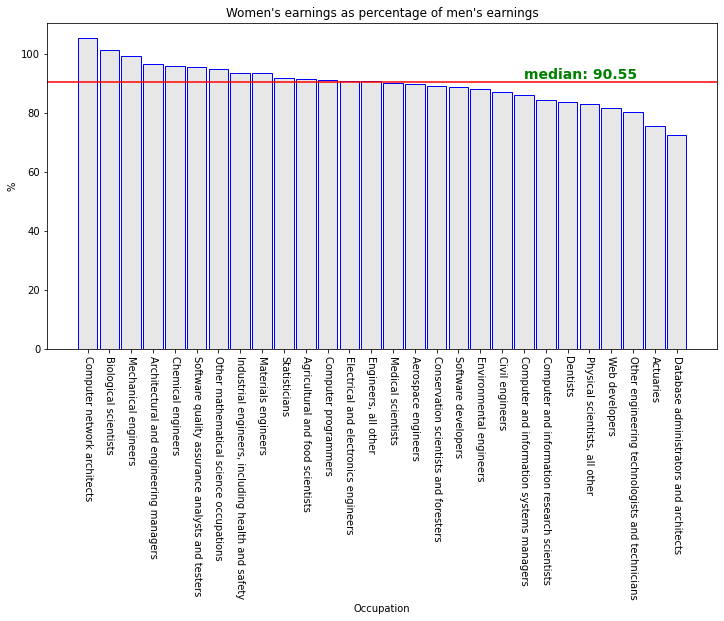

In [56]:
# Bar plot for Women's earnings as percentage of men's earnings

# Bar plot
earnings_median = stem_dol_df["Women's earnings as percentage of men's earnings"].median()
women_pct_sorted = stem_dol_df.sort_values(by="Women's earnings as percentage of men's earnings", ascending=False)
plt.figure(figsize = (12,6))
plt.bar('Occupation', "Women's earnings as percentage of men's earnings", data=women_pct_sorted,width = 0.9, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.axhline(earnings_median, color='r')
plt.annotate('median: '+str(earnings_median), xy=(20, earnings_median+1), color='g',fontweight='bold', fontsize = 14)
plt.xlabel("Occupation")
plt.ylabel("%")
plt.title("Women's earnings as percentage of men's earnings")
plt.xticks(rotation = -90)
plt.show()


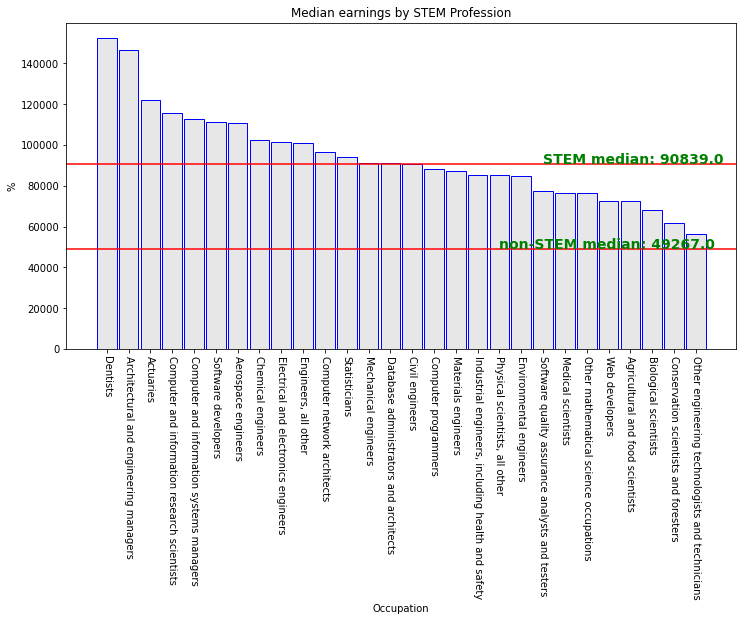

In [55]:
# Bar plot for Median earnings by Profession

# Bar plot
earnings_median = stem_dol_df["Median earnings"].median()
non_stem_median = non_stem_dol_df["Median earnings"].median()
earnings_sorted = stem_dol_df.sort_values(by="Median earnings", ascending=False)
plt.figure(figsize = (12,6))
plt.bar('Occupation', "Median earnings", data=earnings_sorted,width = 0.9, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
# annotate stem median
plt.axhline(earnings_median, color='r')
plt.annotate('STEM median: '+str(earnings_median), xy=(20, earnings_median+100), color='g',fontweight='bold', fontsize = 14)
# annotate non-stem median
plt.axhline(non_stem_median, color='r')
plt.annotate('non-STEM median: '+str(non_stem_median), xy=(18, non_stem_median+100), color='g',fontweight='bold', fontsize = 14)
plt.xlabel("Occupation")
plt.ylabel("%")
plt.title("Median earnings by STEM Profession")
plt.xticks(rotation = -90)
plt.show()


# Data Preprocessing
## Levels.fyi dataset

### Imputation - Identify and impute the features with missing values

In [47]:
# Reading datasets

levels_df = pd.read_csv('./data/levels_fyi_salary_data.csv')

In [129]:
levels_df.dtypes

timestamp                   object
company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
Race                        object
Education           

In [130]:
# Count of NaNs
levels_df.isna().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [48]:
# 'Company': Drop NaN values since there is no way to infer company
levels_df.dropna(subset = ['company'], inplace=True)

# Refactor Companies' names to avoid duplication with misspelled names
# Reducing unique companies' names from 1631 to 1100
levels_df['std_company_name'] = levels_df['company'].map(lambda x: x.strip().lower().replace(" ", "_"))

# Replace NaN values in categorical features with "Unknown" to avoid dropping rows
features_to_replace = {'level': np.nan,
                   'tag': np.nan,
                    'gender': np.nan,
                    'otherdetails': np.nan,
                    'Race': np.nan,
                   'Education': np.nan}

replacement_values = {'level': 'Unknown_level',
                   'tag': 'Unknown_tag',
                    'gender': 'Unknown_gender',
                    'otherdetails': 'No_details',
                    'Race': 'Unknown_race',
                   'Education': 'Unknown_degree'}

levels_df.replace(to_replace=features_to_replace,
                  value=replacement_values,
                  inplace=True)

# 'dmid' replace NA values with 0
levels_df['dmaid'].fillna(0, inplace=True)

# 'gender' rename random value
levels_df['gender'] = levels_df['gender'].replace('Title: Senior Software Engineer','Unknown_gender')
levels_df['gender'] = levels_df['gender'].replace('Other','Other_gender')

# 'Race' rename
levels_df['Race'] = levels_df['Race'].replace('Two Or More','Two_Or_More_race')

# Count of NaNs
levels_df.isna().sum()

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
std_company_name           0
dtype: int64

In [49]:
# 'basesalary' replace 0.0 values with median basesalary for years of experience
level_salary = levels_df.groupby('yearsofexperience')['basesalary'].median().reset_index()
base_salary_dict = level_salary.set_index('yearsofexperience').to_dict()['basesalary']

# check for 0.0 in basesalary column and use yearsofexperience to choose base salary from base_salary_dict
levels_df.loc[levels_df['basesalary'] == 0.0, 'basesalary'] = [base_salary_dict[x] for x in levels_df.loc[levels_df['basesalary'] == 0.0, 'yearsofexperience']]
zero_base_salary = levels_df[levels_df['basesalary'] == 0]
zero_base_salary


Empty DataFrame
Columns: [timestamp, company, level, title, totalyearlycompensation, location, yearsofexperience, yearsatcompany, tag, basesalary, stockgrantvalue, bonus, gender, otherdetails, cityid, dmaid, rowNumber, Masters_Degree, Bachelors_Degree, Doctorate_Degree, Highschool, Some_College, Race_Asian, Race_White, Race_Two_Or_More, Race_Black, Race_Hispanic, Race, Education, std_company_name]
Index: []

In [50]:
# Converting timestamp to datetime64

levels_df['timestamp'] = pd.to_datetime(levels_df['timestamp'])
levels_df.dtypes


timestamp                  datetime64[ns]
company                            object
level                              object
title                              object
totalyearlycompensation             int64
location                           object
yearsofexperience                 float64
yearsatcompany                    float64
tag                                object
basesalary                        float64
stockgrantvalue                   float64
bonus                             float64
gender                             object
otherdetails                       object
cityid                              int64
dmaid                             float64
rowNumber                           int64
Masters_Degree                      int64
Bachelors_Degree                    int64
Doctorate_Degree                    int64
Highschool                          int64
Some_College                        int64
Race_Asian                          int64
Race_White                        

### Feature Selection

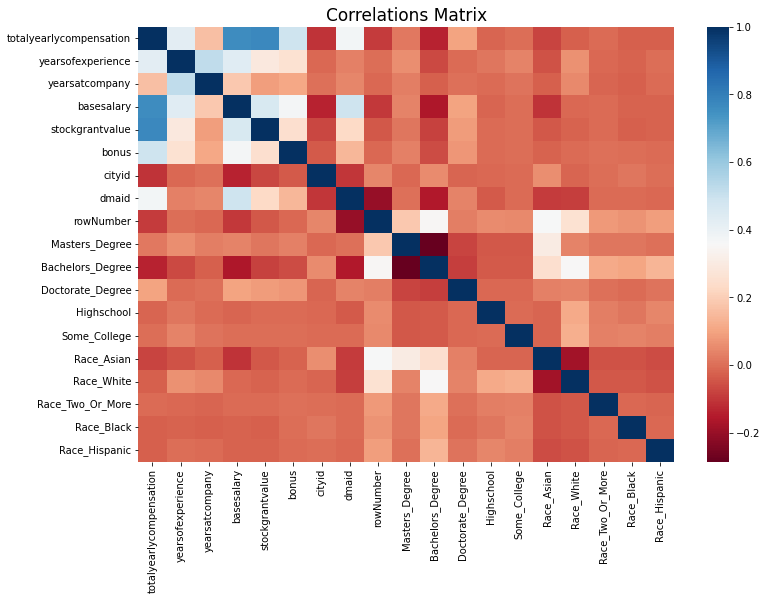

In [98]:
# Correlation Matrix

plt.figure(figsize=(12,8))
sns.heatmap(levels_df.corr(), cmap="RdBu")
plt.title("Correlations Matrix", size=17)
plt.show()

In [51]:
# Mutual Information with standardized numeric features and basesalary as target variable

# Select numeric features, drop base salary
numeric_features_df = levels_df.select_dtypes(include=np.number).copy()
# Drop totalyearlycompensation, bonu, stockgrantvalue since prediction will be made for basesalary
# numeric_features_df.drop(labels=['basesalary', 'totalyearlycompensation', 'bonus', 'stockgrantvalue'], axis=1, inplace=True)
numeric_features_df.drop(labels=['basesalary'], axis=1, inplace=True)
numeric_features_names = numeric_features_df.columns.tolist()

# Standardize
numeric_features_std = preprocessing.scale(numeric_features_df)

# Create a dataframe from ndnumpy array
numeric_std_df = pd.DataFrame(numeric_features_std, columns=numeric_features_names)

y_vector = levels_df['basesalary']
mutual_info_array = feature_selection.mutual_info_regression(X=numeric_std_df, y = y_vector)
mutual_info_array

# Building a dataframe with index = feature's name and column = 'MutualInfo'
mutual_info_df = pd.DataFrame(mutual_info_array, columns=['MutualInfo'], index=numeric_features_names)
mutual_info_df.sort_values(by='MutualInfo', ascending=False, inplace=True)
mutual_info_df


MutualInfo
totalyearlycompensation    1.27e+00
bonus                      4.78e-01
cityid                     3.86e-01
stockgrantvalue            3.46e-01
dmaid                      2.94e-01
yearsofexperience          2.33e-01
rowNumber                  5.46e-02
yearsatcompany             5.31e-02
Bachelors_Degree           2.15e-02
Race_Asian                 1.50e-02
Masters_Degree             6.66e-03
Race_White                 3.99e-03
Highschool                 2.50e-03
Doctorate_Degree           1.41e-03
Race_Hispanic              4.93e-04
Race_Black                 1.54e-04
Some_College               0.00e+00
Race_Two_Or_More           0.00e+00

In [43]:
# Encode Location, Since cityid is a relevant feature

# OPTION 1: Binary Encoding for location

# Requires to install category_encoders run: pip install category_encoders
# Using Binary Encoding Reference: https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
# https://contrib.scikit-learn.org/category_encoders/index.html

# import category_encoders as ce

# binary_encoder = ce.BinaryEncoder(cols=['location'], return_df=True)
# levels_df = binary_encoder.fit_transform(levels_df)

# levels_df.head(10)


In [52]:
# Encode Location

# OPTION 2: One hot encoding TOP X most frequent locations 
location_threshold = 1000 # locations with more than 1000 instances
top_locations = levels_df[levels_df['location'].isin(levels_df['location'].value_counts()[levels_df['location'].value_counts() > location_threshold].index)].location.unique()
top_locations = top_locations.tolist()

# Join locations
levels_df = levels_df.join(pd.get_dummies(levels_df.location)[top_locations])
levels_df.head()

# Optional
levels_df.drop(['cityid', 'location'], axis=1, inplace=True)


In [22]:
# # Encode Location

# # OPTION 3: One hot encoding splitting by countries and cities in the US and selecting TOP X most frequent locations

# # Encode location for different countries and for cities in the US
# levels_df['country'] = levels_df.location.str.split(pat=',').apply(lambda x:x[-1][1:])
# levels_df.loc[levels_df.country.str.len() == 2,'country'] = 'US'

# # Encode Countries: Find countries with more than X instances
# # TODO: decide which countries we want to keep
# country_threshold = 1000 # countries with more than 1000 instances
# top_countries = levels_df[levels_df['country'].isin(levels_df['country'].value_counts()[levels_df['country'].value_counts() > country_threshold].index)].country.unique()
# top_countries = top_countries.tolist()

# # Join countries
# levels_df = levels_df.join(pd.get_dummies(levels_df.country)[top_countries])

# # Encode US cities: Find cities with more than X instances 
# # TODO: decide which US cities we want to keep
# city_threshold = 1000 # cities with more than 1000 instances
# top_us_cities = levels_df[levels_df['location'].isin(levels_df[levels_df['US']==1]['location'].value_counts()[levels_df[levels_df['US']==1]['location'].value_counts() > city_threshold].index)].location.unique()
# top_us_cities = top_us_cities.tolist()

# # Join US cities
# levels_df = levels_df.join(pd.get_dummies(levels_df.location)[top_us_cities])

# # Optional
# levels_df.drop(['cityid', 'location', 'country'], axis=1, inplace=True)


In [53]:
# Encode Race
levels_df.drop(labels=['Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic'], axis=1, inplace=True)
levels_df = levels_df.join(pd.get_dummies(levels_df.Race))

# Encode Gender
levels_df = levels_df.join(pd.get_dummies(levels_df.gender))

# Optional
levels_df.drop(['Race', 'gender'], axis=1, inplace=True)


In [54]:
# Encode Title
stem_titles = ['Product Manager','Software Engineer',
'Software Engineering Manager',
 'Data Scientist',
 'Solution Architect',
 'Technical Program Manager',
 'Hardware Engineer',
 'Mechanical Engineer']

# TODO: choose only Stem_titles or ALL titles

# encoded_df = encoded_df.join(pd.get_dummies(encoded_df.title)[stem_titles])
levels_df = levels_df.join(pd.get_dummies(levels_df.title))

# Optional
levels_df.drop(['title'], axis=1, inplace=True)


In [55]:
# Encode Education
levels_df.drop(labels=['Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College'], axis=1, inplace=True)

# OPTION 1: Ordinal Encoding
education_scale_map = {"Unknown_degree":0, "Highschool":1, "Some College":2, "Bachelor's Degree":3, "Master's Degree":4, "PhD":5}
levels_df['Education'] = levels_df['Education'].replace(education_scale_map)

# OPTION 2: Hot encoding
# levels_df = levels_df.join(pd.get_dummies(levels_df.Education))
# levels_df.drop(['Education'], axis=1, inplace=True)


In [56]:
# Encode Company

# # OPTION 1: Binary Encoding
# # Requires to install category_encoders run: pip install category_encoders
# # Using Binary Encoding Reference: https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

# binary_encoder = ce.BinaryEncoder(cols=['std_company_name'], return_df=True)
# levels_df = encoder.fit_transform(levels_df)

# OPTION 2: Hot encoding the TOP X most frequent companies
company_threshold = 100 # companies with more than X instances
top_companies = levels_df[levels_df['std_company_name'].isin(levels_df['std_company_name'].value_counts()[levels_df['std_company_name'].value_counts() > company_threshold].index)].std_company_name.unique()
top_companies = top_companies.tolist()
# Join top companies
levels_df = levels_df.join(pd.get_dummies(levels_df.std_company_name)[top_companies])

# Optional
levels_df.drop(['company'], axis=1, inplace=True)


In [57]:
# OPTIONAL: Dropping values for not relevant/encoded features:
# 'tag', 'otherdetails', 'dmaid', 'rowNumber' -> not relevant or replicable from user inputs

levels_df.drop(['tag', 'otherdetails', 'dmaid', 'rowNumber'], axis=1, inplace=True)


In [58]:
# Current available columns
print(levels_df.columns.tolist())

['timestamp', 'level', 'totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus', 'Education', 'std_company_name', 'San Francisco, CA', 'Seattle, WA', 'Sunnyvale, CA', 'Mountain View, CA', 'Redmond, WA', 'Menlo Park, CA', 'London, EN, United Kingdom', 'Cupertino, CA', 'New York, NY', 'San Jose, CA', 'Bangalore, KA, India', 'Palo Alto, CA', 'Austin, TX', 'Boston, MA', 'Santa Clara, CA', 'Asian', 'Black', 'Hispanic', 'Two_Or_More_race', 'Unknown_race', 'White', 'Female', 'Male', 'Other_gender', 'Unknown_gender', 'Business Analyst', 'Data Scientist', 'Hardware Engineer', 'Human Resources', 'Management Consultant', 'Marketing', 'Mechanical Engineer', 'Product Designer', 'Product Manager', 'Recruiter', 'Sales', 'Software Engineer', 'Software Engineering Manager', 'Solution Architect', 'Technical Program Manager', 'oracle', 'ebay', 'amazon', 'apple', 'microsoft', 'salesforce', 'facebook', 'uber', 'google', 'netflix', 'pinterest', 'linkedin', '

## Next Steps:

- Train/validate models with different options:
  - Using different options to encode 'std_company_name' and 'location'
  - Using 'Education' as ordinal encoded or just one hot encoded
  - Validate if any of race and gender categories have an impact on prediction
  - Decide whether to use all 'title' or only 'stem_titles'
- Decide if using 'level' feature at all or just drop it
